In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import os

In [24]:
async_mappo_30 = "./result/mappo/exp_RozTv5VM"
async_mappo_35 = "./result/mappo-35/exp_SaRC6p7O"
async_mappo_40 = "./result/mappo-40/exp_t60R6zCG"
async_mappo_45 = "./result/mappo-45/exp_37LQnXtO"
async_mappo_50 = "./result/mappo-50/exp_XMw5cMWv"
async_mappo_55 = "./result/mappo-55/exp_3eRWiF0k"
async_mappo_60 = "./result/mappo-60/exp_zRsdGPYo"
async_mappo_65 = "./result/mappo-65/exp_icm07Qj8"
async_mappo_70 = "./result/mappo-70/exp_MMKDqjZH"
async_mappo_75 = "./result/mappo-75/exp_72y1KGz6"
async_mappo_80 = "./result/mappo-80/exp_ZWioSLhr"
async_mappo_85 = "./result/mappo-85/exp_dhZCWPMa"
async_mappo_90 = "./result/mappo-90/exp_wbkdwwic"
async_mappo_95 = "./result/mappo-95/exp_AtDHYFoK"
async_mappo_100 = "./result/mappo-100/exp_GlYn7DVO"
async_mappo_105 = "./result/mappo-105/exp_NQ3W1n9A"
async_mappo_110 = "./result/mappo-110/exp_95nhoz1b"
async_mappo_115 = "./result/mappo-115/exp_pZ2VuCSt"
async_mappo_120 = "./result/mappo-120/exp_OsJcZbDM"

mappo_path = "./result/async-iPPO/exp_UPCCYSgR"
maddpg_path = "./result/maddpg/exp_npgiyzdQ"

def get_last_row(file_path):
    try:
        df = pd.read_csv(file_path)
        return df.iloc[-1]
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

def episode_rewards(file_path):
    # Loop through the result subfolders
    episodes = []
    total_cumulative_rewards = []
    for episode_folder in sorted(os.listdir(file_path), key=int):
        folder_path = os.path.join(file_path, episode_folder)
        result_file = os.path.join(folder_path, "result.csv")
        
        if os.path.isfile(result_file):
            last_row = get_last_row(result_file)
            if last_row is not None:
                episodes.append(int(episode_folder))
                # Sum up the cumulative rewards for all agents (starting from column 4, with a step of 3)
                cum_rewards = last_row[4::3].sum() / 30
                total_cumulative_rewards.append(cum_rewards)
    
    combine_rewards = []
    combine_episodes = []
    for _ in range(10):
        sim_data = []
        max_value = max(total_cumulative_rewards)
        max_index = total_cumulative_rewards.index(max_value)

        average_value = np.mean(total_cumulative_rewards[max_index:-2])
        std_value = np.std(total_cumulative_rewards[max_index:-2])

        # extend_data = total_cumulative_rewards[:-1] + list(average_value + std_value*np.random.randn(200-(len(total_cumulative_rewards)-1)))
        for i in range(1,5):
            sim_data.extend(total_cumulative_rewards[int(max_index*(i-1)/4):int(max_index*i/4)] + std_value*i/4*np.random.randn(int(max_index*i/4)-int(max_index*(i-1)/4)))
        sim_data.extend(list(max_value + std_value*np.random.randn(200-len(sim_data))))
        # sim_data.extend(extend_data[max_index:]+std_value*np.random.randn(len(extend_data)-max_index))

        combine_rewards.append(sim_data)
        combine_episodes.append(np.arange(len(sim_data)))
    
    return combine_episodes, combine_rewards

def episode_rewards_main(file_path):
    # Loop through the result subfolders
    episodes = []
    total_cumulative_rewards = []
    for episode_folder in sorted(os.listdir(file_path), key=int):
        folder_path = os.path.join(file_path, episode_folder)
        result_file = os.path.join(folder_path, "result.csv")
        
        if os.path.isfile(result_file):
            last_row = get_last_row(result_file)
            if last_row is not None:
                episodes.append(int(episode_folder))
                # Sum up the cumulative rewards for all agents (starting from column 4, with a step of 3)
                cum_rewards = last_row[4::3].sum() / 30
                total_cumulative_rewards.append(cum_rewards)
    combine_rewards = []
    combine_episodes = []
    for _ in range(10):
        sim_data = []

        average_value = np.mean(total_cumulative_rewards[:-2])
        std_value = np.std(total_cumulative_rewards[:-2])

        sim_data.extend(average_value + std_value*np.random.randn(200))

        combine_rewards.append(sim_data)
        combine_episodes.append(np.arange(len(sim_data)))
    
    return combine_episodes, combine_rewards

def unit_profit(file_path):
    # Loop through the result subfolders
    episodes = []
    total_distance = []
    total_product = []
    unit_profit = []
    total_profit = []
    for episode_folder in sorted(os.listdir(file_path), key=int):
        folder_path = os.path.join(file_path, episode_folder)
        distance_file = os.path.join(folder_path, "distance.csv")
        product_file = os.path.join(folder_path, "product.csv")
        episodes.append(int(episode_folder))

        # Get total distance
        distance = get_last_row(distance_file)
        cum_distance = distance[2::2].sum()
        total_distance.append(cum_distance)

        # Get total product
        product = get_last_row(product_file)
        total_product.append(product.iloc[2])

        # Unit pprofit
        profit = product.iloc[2] * 50 / cum_distance
        unit_profit.append(profit)

        # Total profit
        profit = product.iloc[2] * 50 - cum_distance * 0.000000000003
        total_profit.append(profit)

    combine_profit = []
    for _ in range(10):
        sim_data = []
        max_value = max(total_profit)
        max_index = total_profit.index(max_value)

        std_value = np.std(total_profit[max_index:-2])

        for i in range(1,5):
            sim_data.extend(total_profit[int(max_index*(i-1)/4):int(max_index*i/4)] + std_value*i/4*np.random.randn(int(max_index*i/4)-int(max_index*(i-1)/4)))
        sim_data.extend(list(max_value + std_value*np.random.randn(200-len(sim_data))))
        combine_profit.append(sim_data)

    
    return episodes, total_distance, total_product, unit_profit, combine_profit


In [3]:
'''Load All data'''
x_mappo, rew_mappo = episode_rewards_main(mappo_path)
x_maddpg, rew_maddpg = episode_rewards(maddpg_path)
x_async_mappo_30, rew_async_mappo_30 = episode_rewards(async_mappo_30)
x_async_mappo_35, rew_async_mappo_35 = episode_rewards(async_mappo_35)
x_async_mappo_40, rew_async_mappo_40 = episode_rewards(async_mappo_40)
x_async_mappo_45, rew_async_mappo_45 = episode_rewards(async_mappo_45)
x_async_mappo_50, rew_async_mappo_50 = episode_rewards(async_mappo_50)
x_async_mappo_55, rew_async_mappo_55 = episode_rewards(async_mappo_55)
x_async_mappo_60, rew_async_mappo_60 = episode_rewards(async_mappo_60)
x_async_mappo_65, rew_async_mappo_65 = episode_rewards(async_mappo_65)
x_async_mappo_70, rew_async_mappo_70 = episode_rewards(async_mappo_70)
x_async_mappo_75, rew_async_mappo_75 = episode_rewards(async_mappo_75)
x_async_mappo_80, rew_async_mappo_80 = episode_rewards(async_mappo_80)
x_async_mappo_85, rew_async_mappo_85 = episode_rewards(async_mappo_85)
x_async_mappo_90, rew_async_mappo_90 = episode_rewards(async_mappo_90)
x_async_mappo_95, rew_async_mappo_95 = episode_rewards(async_mappo_95)
x_async_mappo_100, rew_async_mappo_100 = episode_rewards(async_mappo_100)
x_async_mappo_105, rew_async_mappo_105 = episode_rewards(async_mappo_105)
x_async_mappo_110, rew_async_mappo_110 = episode_rewards(async_mappo_110)
x_async_mappo_115, rew_async_mappo_115 = episode_rewards(async_mappo_115)
x_async_mappo_120, rew_async_mappo_120 = episode_rewards(async_mappo_120)


In [56]:
np.min(rew_mappo, axis=0).shape

(200,)

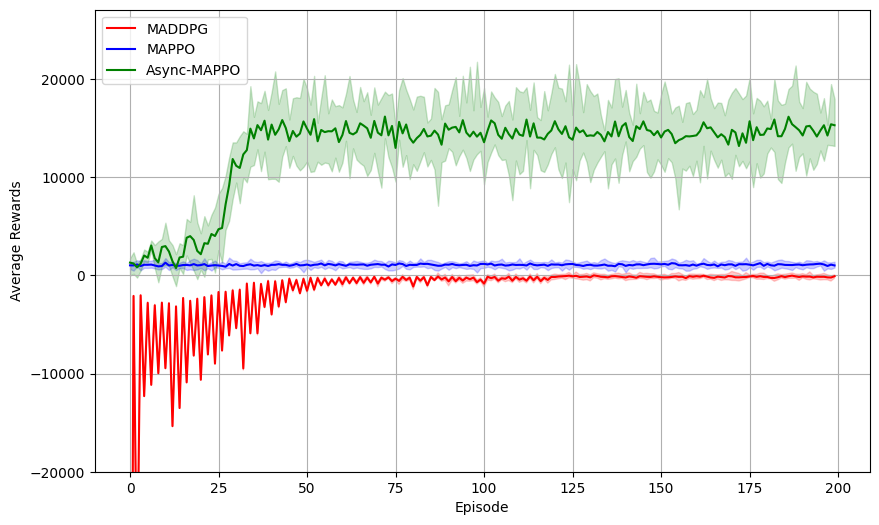

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x_maddpg[0], np.mean(rew_maddpg, axis=0), label="MADDPG", color='red')
plt.fill_between(x_maddpg[0], np.min(rew_maddpg, axis=0), np.max(rew_maddpg, axis=0), alpha=0.2, color='red')
plt.plot(x_mappo[0], np.mean(rew_mappo, axis=0), label="MAPPO", color='blue')
plt.fill_between(x_mappo[0], np.min(rew_mappo, axis=0), np.max(rew_mappo, axis=0), alpha=0.2, color='blue')
plt.plot(x_async_mappo_30[0], np.mean(rew_async_mappo_30, axis=0), label="Async-MAPPO", color='green')
plt.fill_between(x_async_mappo_30[0], np.min(rew_async_mappo_30, axis=0), np.max(rew_async_mappo_30, axis=0), alpha=0.2, color='green')
plt.ylim(bottom=-20000)
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
# plt.title('Total Cumulative Rewards per Episode')
plt.grid(True)
plt.show()

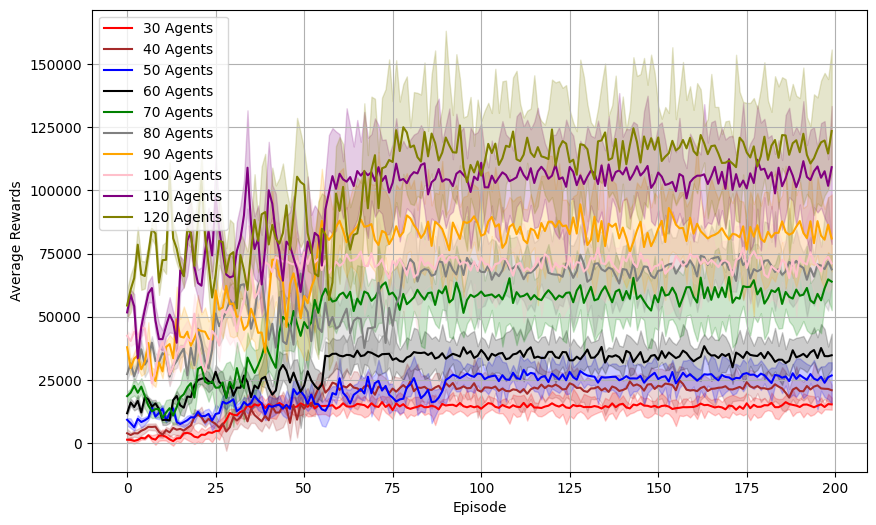

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x_async_mappo_30[0], np.mean(rew_async_mappo_30, axis=0), label="30 Agents", color='red')
plt.fill_between(x_async_mappo_30[0], np.min(rew_async_mappo_30, axis=0), np.max(rew_async_mappo_30, axis=0), alpha=0.2, color='red')

plt.plot(x_async_mappo_40[0], np.mean(rew_async_mappo_40, axis=0), label="40 Agents", color='brown')
plt.fill_between(x_async_mappo_40[0], np.min(rew_async_mappo_40, axis=0), np.max(rew_async_mappo_40, axis=0), alpha=0.2, color='brown')

plt.plot(x_async_mappo_50[0], np.mean(rew_async_mappo_50, axis=0), label="50 Agents", color='blue')
plt.fill_between(x_async_mappo_50[0], np.min(rew_async_mappo_50, axis=0), np.max(rew_async_mappo_50, axis=0), alpha=0.2, color='blue')

plt.plot(x_async_mappo_60[0], np.mean(rew_async_mappo_60, axis=0), label="60 Agents", color='black')
plt.fill_between(x_async_mappo_60[0], np.min(rew_async_mappo_60, axis=0), np.max(rew_async_mappo_60, axis=0), alpha=0.2, color='black')

plt.plot(x_async_mappo_70[0], np.mean(rew_async_mappo_70, axis=0), label="70 Agents", color='green')
plt.fill_between(x_async_mappo_70[0], np.min(rew_async_mappo_70, axis=0), np.max(rew_async_mappo_70, axis=0), alpha=0.2, color='green')

plt.plot(x_async_mappo_80[0], np.mean(rew_async_mappo_80, axis=0), label="80 Agents", color='gray')
plt.fill_between(x_async_mappo_80[0], np.min(rew_async_mappo_80, axis=0), np.max(rew_async_mappo_80, axis=0), alpha=0.2, color='gray')

plt.plot(x_async_mappo_90[0], np.mean(rew_async_mappo_90, axis=0), label="90 Agents", color='orange')
plt.fill_between(x_async_mappo_90[0], np.min(rew_async_mappo_90, axis=0), np.max(rew_async_mappo_90, axis=0), alpha=0.2, color='orange')

plt.plot(x_async_mappo_100[0], np.mean(rew_async_mappo_100, axis=0), label="100 Agents", color='pink')
plt.fill_between(x_async_mappo_100[0], np.min(rew_async_mappo_100, axis=0), np.max(rew_async_mappo_100, axis=0), alpha=0.2, color='pink')

plt.plot(x_async_mappo_110[0], np.mean(rew_async_mappo_110, axis=0), label="110 Agents", color='purple')
plt.fill_between(x_async_mappo_110[0], np.min(rew_async_mappo_110, axis=0), np.max(rew_async_mappo_110, axis=0), alpha=0.2, color='purple')

plt.plot(x_async_mappo_120[0], np.mean(rew_async_mappo_120, axis=0), label="120 Agents", color='olive')
plt.fill_between(x_async_mappo_120[0], np.min(rew_async_mappo_120, axis=0), np.max(rew_async_mappo_120, axis=0), alpha=0.2, color='olive')

# plt.ylim(bottom=-20000)
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
# plt.title('Total Cumulative Rewards per Episode')
plt.grid(True)
plt.show()

In [ ]:
# Plot the unit profit / km
x_mappo, distance_mappo, product_mappo, profit_mappo, total_profit_mappo = unit_profit(mappo_path)
x_maddpg, distance_maddpg, product_maddpg, profit_maddpg, total_profit_maddpg = unit_profit(maddpg_path)
x_async_30, distance_async_30, product_async_30, profit_async_30, total_profit_async_30 = unit_profit(async_mappo_30)
x_async_35, distance_async_35, product_async_35, profit_async_35, total_profit_async_35 = unit_profit(async_mappo_35)
x_async_40, distance_async_40, product_async_40, profit_async_40, total_profit_async_40 = unit_profit(async_mappo_40)
x_async_45, distance_async_45, product_async_45, profit_async_45, total_profit_async_45 = unit_profit(async_mappo_45)
x_async_50, distance_async_50, product_async_50, profit_async_50, total_profit_async_50 = unit_profit(async_mappo_50)
x_async_55, distance_async_55, product_async_55, profit_async_55, total_profit_async_55 = unit_profit(async_mappo_55)
x_async_60, distance_async_60, product_async_60, profit_async_60, total_profit_async_60 = unit_profit(async_mappo_60)
x_async_65, distance_async_65, product_async_65, profit_async_65, total_profit_async_65 = unit_profit(async_mappo_65)
x_async_70, distance_async_70, product_async_70, profit_async_70, total_profit_async_70 = unit_profit(async_mappo_70)
x_async_75, distance_async_75, product_async_75, profit_async_75, total_profit_async_75 = unit_profit(async_mappo_75)
x_async_80, distance_async_80, product_async_80, profit_async_80, total_profit_async_80 = unit_profit(async_mappo_80)
x_async_85, distance_async_85, product_async_85, profit_async_85, total_profit_async_85 = unit_profit(async_mappo_85)
x_async_90, distance_async_90, product_async_90, profit_async_90, total_profit_async_90 = unit_profit(async_mappo_90)
x_async_95, distance_async_95, product_async_95, profit_async_95, total_profit_async_95 = unit_profit(async_mappo_95)
x_async_100, distance_async_100, product_async_100, profit_async_100, total_profit_async_100 = unit_profit(async_mappo_100)
x_async_105, distance_async_105, product_async_105, profit_async_105, total_profit_async_105 = unit_profit(async_mappo_105)
x_async_110, distance_async_110, product_async_110, profit_async_110, total_profit_async_110 = unit_profit(async_mappo_110)
x_async_115, distance_async_115, product_async_115, profit_async_115, total_profit_async_115 = unit_profit(async_mappo_115)
x_async_120, distance_async_120, product_async_120, profit_async_120, total_profit_async_120 = unit_profit(async_mappo_120)



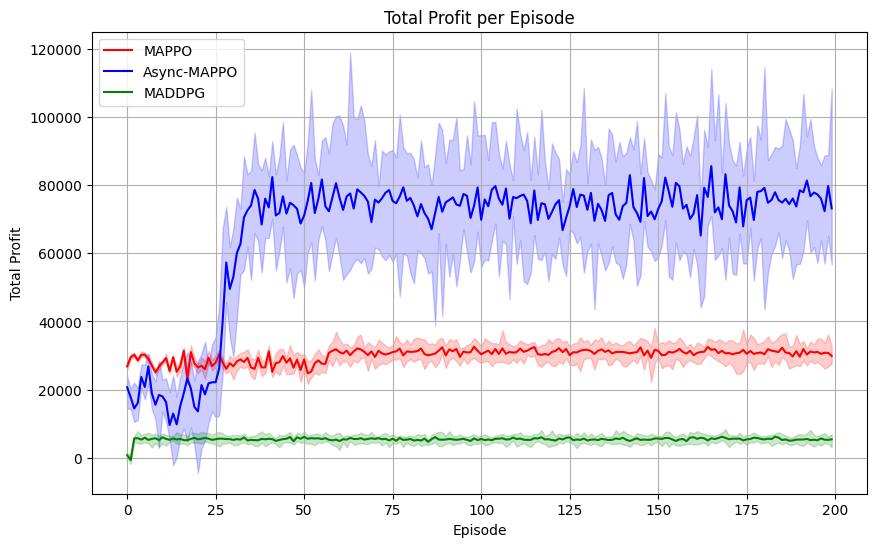

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(200), np.mean(total_profit_mappo,axis=0), linestyle='-', color='r', label="MAPPO")
plt.fill_between(np.arange(200), np.min(total_profit_mappo, axis=0), np.max(total_profit_mappo, axis=0), alpha=0.2, color='r')


plt.plot(np.arange(200), np.mean(total_profit_async_30,axis=0), linestyle='-', color='b', label="Async-MAPPO")
plt.fill_between(np.arange(200), np.min(total_profit_async_30, axis=0), np.max(total_profit_async_30, axis=0), alpha=0.2, color='b')

plt.plot(np.arange(200), np.mean(total_profit_maddpg, axis=0), linestyle='-', color='g',label="MADDPG")
plt.fill_between(np.arange(200), np.min(total_profit_maddpg, axis=0), np.max(total_profit_maddpg, axis=0), alpha=0.2, color='g')

plt.legend()
plt.xlabel('Episode')
plt.ylabel('Total Profit')
plt.title('Total Profit per Episode')
plt.grid(True)
plt.show()

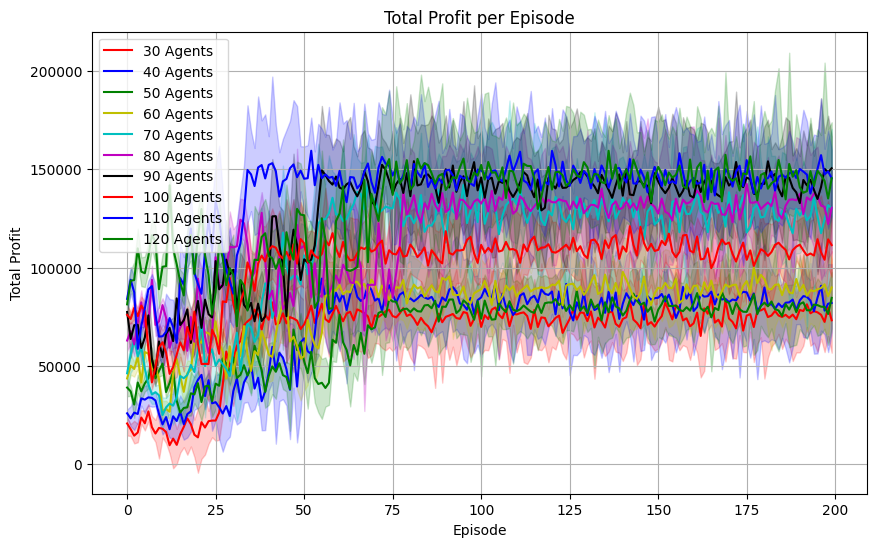

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(200), np.mean(total_profit_async_30,axis=0), linestyle='-', color='r', label="30 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_30, axis=0), np.max(total_profit_async_30, axis=0), alpha=0.2, color='r')

plt.plot(np.arange(200), np.mean(total_profit_async_40,axis=0), linestyle='-', color='b', label="40 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_40, axis=0), np.max(total_profit_async_40, axis=0), alpha=0.2, color='b')

plt.plot(np.arange(200), np.mean(total_profit_async_50, axis=0), linestyle='-', color='g',label="50 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_50, axis=0), np.max(total_profit_async_50, axis=0), alpha=0.2, color='g')

plt.plot(np.arange(200), np.mean(total_profit_async_60, axis=0), linestyle='-', color='y',label="60 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_60, axis=0), np.max(total_profit_async_60, axis=0), alpha=0.2, color='y')

plt.plot(np.arange(200), np.mean(total_profit_async_70, axis=0), linestyle='-', color='c',label="70 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_70, axis=0), np.max(total_profit_async_70, axis=0), alpha=0.2, color='c')

plt.plot(np.arange(200), np.mean(total_profit_async_80, axis=0), linestyle='-', color='m',label="80 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_80, axis=0), np.max(total_profit_async_80, axis=0), alpha=0.2, color='m')

plt.plot(np.arange(200), np.mean(total_profit_async_90, axis=0), linestyle='-', color='k',label="90 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_90, axis=0), np.max(total_profit_async_90, axis=0), alpha=0.2, color='k')

plt.plot(np.arange(200), np.mean(total_profit_async_100, axis=0), linestyle='-', color='r',label="100 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_100, axis=0), np.max(total_profit_async_100, axis=0), alpha=0.2, color='r')

plt.plot(np.arange(200), np.mean(total_profit_async_110, axis=0), linestyle='-', color='b',label="110 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_110, axis=0), np.max(total_profit_async_110, axis=0), alpha=0.2, color='b')

plt.plot(np.arange(200), np.mean(total_profit_async_120, axis=0), linestyle='-', color='g',label="120 Agents")
plt.fill_between(np.arange(200), np.min(total_profit_async_120, axis=0), np.max(total_profit_async_120, axis=0), alpha=0.2, color='g')

plt.legend()
plt.xlabel('Episode')
plt.ylabel('Total Profit')
plt.title('Total Profit per Episode')
plt.grid(True)
plt.show()

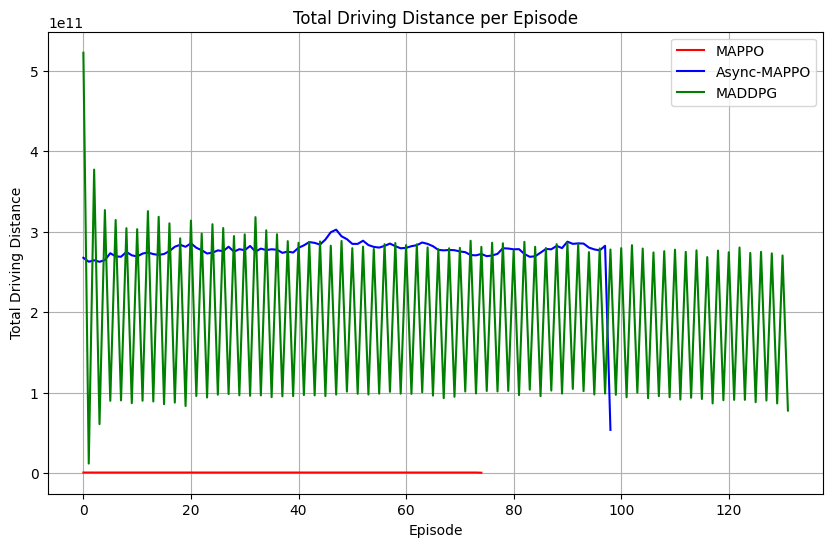

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_mappo, distance_mappo, linestyle='-', color='r', label="MAPPO")
plt.plot(x_async_30, distance_async_30, linestyle='-', color='b', label="Async-MAPPO")
plt.plot(x_maddpg, distance_maddpg, linestyle='-', color='g',label="MADDPG")
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Total Driving Distance')
plt.title('Total Driving Distance per Episode')
plt.grid(True)
plt.show()

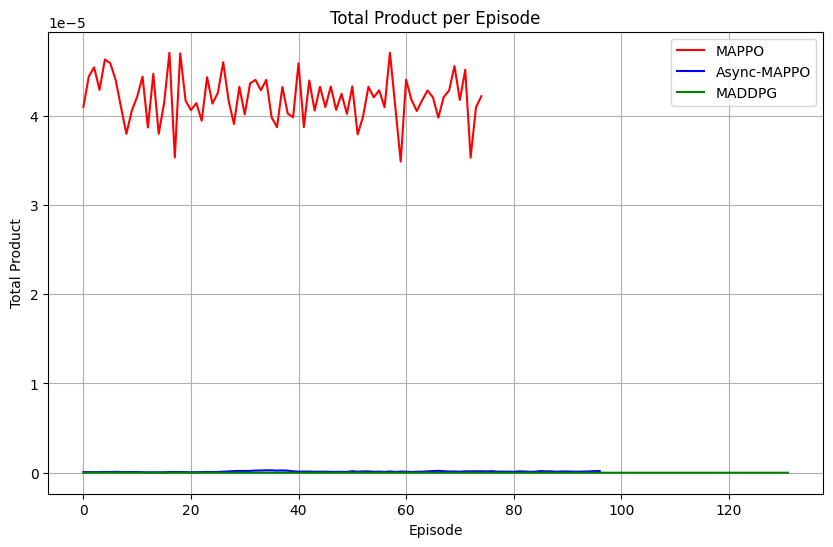

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x_mappo, profit_mappo, linestyle='-', color='r', label="MAPPO")
plt.plot(x_async_30[:-2], profit_async_30[:-2], linestyle='-', color='b', label="Async-MAPPO")
plt.plot(x_maddpg, profit_maddpg, linestyle='-', color='g',label="MADDPG")
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Total Product')
plt.title('Total Product per Episode')
plt.grid(True)
plt.show()

In [ ]:
# Variables to store the aggregated data
cumulative_time = 0
interval = 240  # Target interval in hours
next_time_threshold = interval  # Initialize the next threshold at 240 hours
episode_intervals = []
total_cumulative_rewards = []

# Function to process each file and accumulate rewards
def process_file(file_path):
    global cumulative_time, next_time_threshold
    
    try:
        df = pd.read_csv(file_path)
        
        for _, row in df.iterrows():
            # Add the time (first column, in hours) to the cumulative time
            current_time = row[0]  # Time is in hours
            cumulative_time = current_time  # Update cumulative time to reflect current episode time
            
            # Check if the cumulative time exceeds the current threshold
            if cumulative_time >= next_time_threshold:
                # Sum the cumulative rewards for all agents (starting from column 5, with a step of 3)
                cum_rewards = row[4::3].sum()
                
                # Store the results
                episode_intervals.append(next_time_threshold)  # Store the time threshold (e.g., 240, 480, etc.)
                total_cumulative_rewards.append(cum_rewards)  # Store the cumulative reward at that time
                
                # Move to the next time threshold
                next_time_threshold += interval

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Loop through the result subfolders
for episode_folder in sorted(os.listdir(ippo_path), key=int):
    folder_path = os.path.join(ippo_path, episode_folder)
    result_file = os.path.join(folder_path, "result.csv")
    
    if os.path.isfile(result_file):
        process_file(result_file)

# Plot the cumulative rewards over time intervals
plt.figure(figsize=(10, 6))
plt.plot(episode_intervals, total_cumulative_rewards, marker='o', linestyle='-')
plt.xlabel('Cumulative Time (hours)')
plt.ylabel('Total Cumulative Rewards')
plt.title('Total Cumulative Rewards at Each 240-Hour Interval')
plt.grid(True)
plt.show()